# Visualize Watch Percentage

This notebook visualize watch percentage of a specified course and a specified enrollment mode

## 1. Initializes file paths

In [ ]:
COURSE_NAME = 'ARCH301'
ENROLLMENT_MODE = 'audit'
WATCH_PERCENTAGE_FOLDER_PATH = 'course_data/' + COURSE_NAME + '/watch_percentage/' + ENROLLMENT_MODE
COLOR = 'royalblue' if ENROLLMENT_MODE == 'audit' else 'orange'
GRAPH_TITLE = 'Video watch percentage of ' + ENROLLMENT_MODE + ' users in '+COURSE_NAME

## 2. Load data

In [18]:
print(WATCH_PERCENTAGE_FOLDER_PATH)

course_data/ARCH301/watch_percentage/audit


In [19]:
import os
import pandas as pd

csv_files = [os.path.join(WATCH_PERCENTAGE_FOLDER_PATH, f) for f in os.listdir(WATCH_PERCENTAGE_FOLDER_PATH) if f.endswith('.csv')]
# Read and concatenate all CSVs
print(csv_files)

['course_data/ARCH301/watch_percentage/audit/ARCH301_audit_2021_watch_percentage.csv', 'course_data/ARCH301/watch_percentage/audit/ARCH301_audit_2022_watch_percentage.csv', 'course_data/ARCH301/watch_percentage/audit/ARCH301_audit_2023_watch_percentage.csv']


In [20]:
combined_df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

print(combined_df.head())

                                   username  watch_percentage
0  009681e7bab74e72e33db81032c0b347de4d3e10          1.588822
1  0845438bff76e63ee24dd5f30f37c62a36f48b55          6.134697
2  0d63c9fe596f66fd3c0ff18f6853fcaf7ee44884          1.490096
3  0e424401ea062cf6044614cf13c9474ca19d23cb          1.048284
4  21cd9b384c8919cf75eeb46aae33ab96310294c3          1.452157


## 3. Visualize Watch Percentage


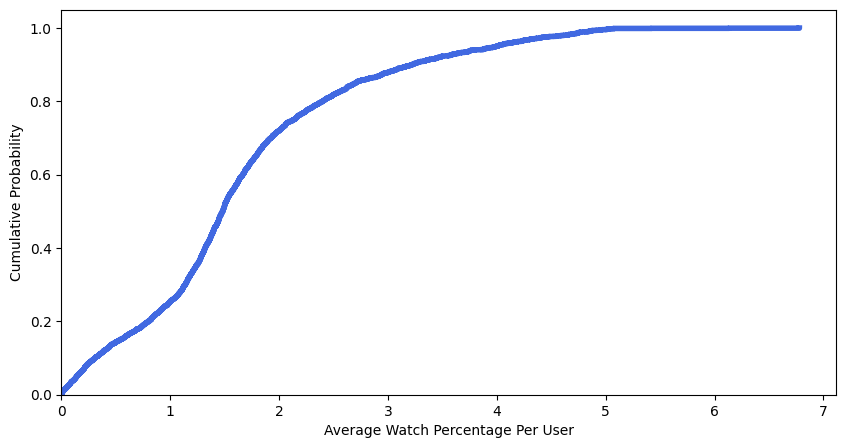

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom bin edges (0 to 5 with intervals of 0.25)
#bins = np.arange(0, 5.25, 0.25)

# Create a figure and plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.ecdfplot(data=combined_df, x="watch_percentage", ax=ax, color="royalblue", linewidth=4)

# Add labels
ax.set_xlabel("Average Watch Percentage Per User")
ax.set_ylabel("Cumulative Probability")
ax.set_title(GRAPH_TITLE)

# Adjust axes
ax.set_xlim(left=0)
ax.set_ylim(bottom=0, top=1.05)  # Since CDF values go from 0 to 1

# Adjust spines to intersect at (0, 0)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))